# Exploratory Data Analysis



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
loan_df = pd.read_csv('vehicle_loans_clean.csv', index_col='UNIQUEID')

In [8]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 420825 to 630213
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   DISBURSED_AMOUNT                     233154 non-null  int64  
 1   ASSET_COST                           233154 non-null  int64  
 2   LTV                                  233154 non-null  float64
 3   BRANCH_ID                            233154 non-null  int64  
 4   SUPPLIER_ID                          233154 non-null  int64  
 5   MANUFACTURER_ID                      233154 non-null  int64  
 6   CURRENT_PINCODE_ID                   233154 non-null  int64  
 7   EMPLOYMENT_TYPE                      233154 non-null  object 
 8   STATE_ID                             233154 non-null  int64  
 9   EMPLOYEE_CODE_ID                     233154 non-null  int64  
 10  MOBILENO_AVL_FLAG                    233154 non-null  int64  
 11  AADHAR_F

In [9]:
loan_df.nunique()

DISBURSED_AMOUNT                       24565
ASSET_COST                             46252
LTV                                     6579
BRANCH_ID                                 82
SUPPLIER_ID                             2953
MANUFACTURER_ID                           11
CURRENT_PINCODE_ID                      6698
EMPLOYMENT_TYPE                            3
STATE_ID                                  22
EMPLOYEE_CODE_ID                        3270
MOBILENO_AVL_FLAG                          1
AADHAR_FLAG                                2
PAN_FLAG                                   2
VOTERID_FLAG                               2
DRIVING_FLAG                               2
PASSPORT_FLAG                              2
PERFORM_CNS_SCORE                        573
PERFORM_CNS_SCORE_DESCRIPTION             20
PRI_NO_OF_ACCTS                          108
PRI_ACTIVE_ACCTS                          40
PRI_OVERDUE_ACCTS                         22
PRI_CURRENT_BALANCE                    71341
PRI_SANCTI

- MOBILE_AVL_FLAG has only one unique value.

In [10]:
loan_df['MOBILENO_AVL_FLAG'].value_counts()

1    233154
Name: MOBILENO_AVL_FLAG, dtype: int64

In [11]:
loan_df = loan_df.drop(['MOBILENO_AVL_FLAG'], axis = 1)

- BRANCH_ID: Branch where the loan was disbursed
- SUPPLIER_ID: Vehicle Dealer where the loan was disbursed 
- MANUFACTURER_ID: Vehicle manufacturer(Hero, Honda, TVS etc.)
- CURRENT_PINCODE_ID: Current pincode of the customer
- STATE_ID: State of disbursement
- EMPLOYEE_CODE_ID: Employee of the organization who logged the disbursement

In [12]:
loan_df[['SUPPLIER_ID', 'CURRENT_PINCODE_ID', 'EMPLOYEE_CODE_ID', 'BRANCH_ID', 'STATE_ID', 'MANUFACTURER_ID']].sample(10)

SUPPLIER_ID  CURRENT_PINCODE_ID  EMPLOYEE_CODE_ID  BRANCH_ID  \
UNIQUEID                                                                 
491948          18176                3249               580         17   
556014          14698                1732              1774          2   
576879          22417                  43               323        160   
445687          22045                1482               743         67   
608058          16686                2593              3196         74   
507972          18599                2186              2183        117   
502722          18471                5706              1831         10   
551722          21064                6478               776        165   
491192          20438                3707              2739        136   
545442          23643                3359              3130        138   

          STATE_ID  MANUFACTURER_ID  
UNIQUEID                             
491948          17               86  
556014           4               45  
576879           1               51  
445687           6               86  
608058           4               48  
507972           4               45  
502722           3               48  
551722           5               86  
491192           8               51  
545442           9               86

In [13]:
loan_df = loan_df.drop(['SUPPLIER_ID', 'CURRENT_PINCODE_ID', 'EMPLOYEE_CODE_ID', 'BRANCH_ID'], axis=1)

86     109534
45      56626
51      27204
48      16710
49      10220
120      9658
67       2405
145       778
153        12
152         6
156         1
Name: MANUFACTURER_ID, dtype: int64
86     0.469792
45     0.242870
51     0.116678
48     0.071669
49     0.043834
120    0.041423
67     0.010315
145    0.003337
153    0.000051
152    0.000026
156    0.000004
Name: MANUFACTURER_ID, dtype: float64


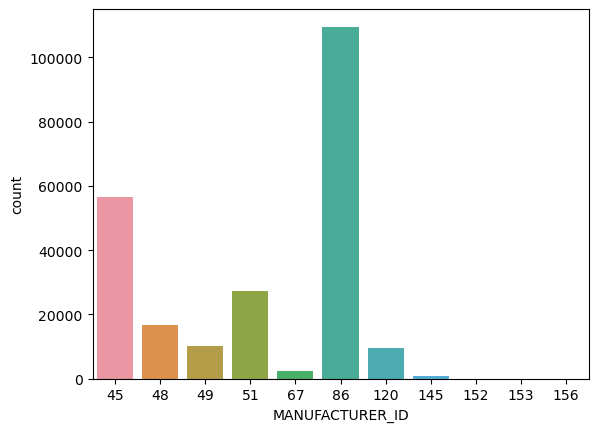

In [14]:
print(loan_df['MANUFACTURER_ID'].value_counts())
print(loan_df['MANUFACTURER_ID'].value_counts(normalize=True))
sns.countplot(x="MANUFACTURER_ID", data=loan_df)
plt.show()

In [15]:
loan_df.groupby('MANUFACTURER_ID')

In [16]:
loan_df.groupby('MANUFACTURER_ID').max()

DISBURSED_AMOUNT  ASSET_COST    LTV EMPLOYMENT_TYPE  \
MANUFACTURER_ID                                                        
45                         105768      123865  95.00   Self employed   
48                         167447      219140  85.00   Self employed   
49                         332045      459625  89.95   Self employed   
51                         191392      286350  90.00   Self employed   
67                         190887      260715  89.99   Self employed   
86                         166972      237534  95.00   Self employed   
120                        117227      150113  90.00   Self employed   
145                         96899      131000  84.94   Self employed   
152                        990572     1628992  84.79   Self employed   
153                         98480      221779  57.32   Self employed   
156                        987354     1328954  75.25   Self employed   

                 STATE_ID  AADHAR_FLAG  PAN_FLAG  VOTERID_FLAG  DRIVING_FLAG  \
MANUFACTURER_ID                                                                
45                     22            1         1             1             1   
48                     20            1         1             1             1   
49                     20            1         1             1             1   
51                     22            1         1             1             1   
67                     21            1         1             1             1   
86                     22            1         1             1             1   
120                    21            1         1             1             1   
145                    17            1         1             1             1   
152                     9            1         1             0             0   
153                    13            1         1             1             1   
156                     4            1         0             0             0   

                 PASSPORT_FLAG  ...  PRIMARY_INSTAL_AMT SEC_INSTAL_AMT  \
MANUFACTURER_ID                 ...                                      
45                           1  ...            15019914        1814000   
48                           1  ...            25642806        4170901   
49                           1  ...             3750505         289051   
51                           1  ...            11305579        1589946   
67                           1  ...             2658172         239822   
86                           1  ...            20766553        3246710   
120                          1  ...             6274520         430379   
145                          1  ...              684178          20211   
152                          0  ...               45117              0   
153                          0  ...                3300              0   
156                          0  ...               23836              0   

                 NEW_ACCTS_IN_LAST_SIX_MONTHS  \
MANUFACTURER_ID                                 
45                                         35   
48                                         20   
49                                         12   
51                                         21   
67                                         13   
86                                         28   
120                                        17   
145                                        11   
152                                         3   
153                                         1   
156                                         2   

                 DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS  NO_OF_INQUIRIES  \
MANUFACTURER_ID                                                         
45                                                11               23   
48                                                 7               13   
49                                                 7               19   
51                                                 7               19   


- Nowsee the max value for each column for every ‘MANUFACTURER_ID’
- Select subsets of the groups and perform operations on them


In [17]:
loan_df.groupby('MANUFACTURER_ID')['LOAN_DEFAULT'].value_counts()

MANUFACTURER_ID  LOAN_DEFAULT
45               0               43687
                 1               12939
48               0               12156
                 1                4554
49               0                7984
                 1                2236
51               0               21547
                 1                5657
67               0                1882
                 1                 523
86               0               87124
                 1               22410
120              0                7526
                 1                2132
145              0                 622
                 1                 156
152              0                   6
153              0                   8
                 1                   4
156              0                   1
Name: LOAN_DEFAULT, dtype: int64

In [18]:
loan_df.groupby('MANUFACTURER_ID')['LOAN_DEFAULT'].value_counts().unstack(level=-1)

LOAN_DEFAULT           0        1
MANUFACTURER_ID                  
45               43687.0  12939.0
48               12156.0   4554.0
49                7984.0   2236.0
51               21547.0   5657.0
67                1882.0    523.0
86               87124.0  22410.0
120               7526.0   2132.0
145                622.0    156.0
152                  6.0      NaN
153                  8.0      4.0
156                  1.0      NaN

In [19]:
loan_df.groupby('MANUFACTURER_ID')['LOAN_DEFAULT'].value_counts(normalize=True).unstack(level=-1)

LOAN_DEFAULT            0         1
MANUFACTURER_ID                    
45               0.771501  0.228499
48               0.727469  0.272531
49               0.781213  0.218787
51               0.792053  0.207947
67               0.782536  0.217464
86               0.795406  0.204594
120              0.779250  0.220750
145              0.799486  0.200514
152              1.000000       NaN
153              0.666667  0.333333
156              1.000000       NaN

- Loans for some manufacturers default at higher rates than others
- Cars from manufacturer 48 defaulted most frequently. *With the exception of 153 which only had 12 total loans which is not enough data to give us solid insight

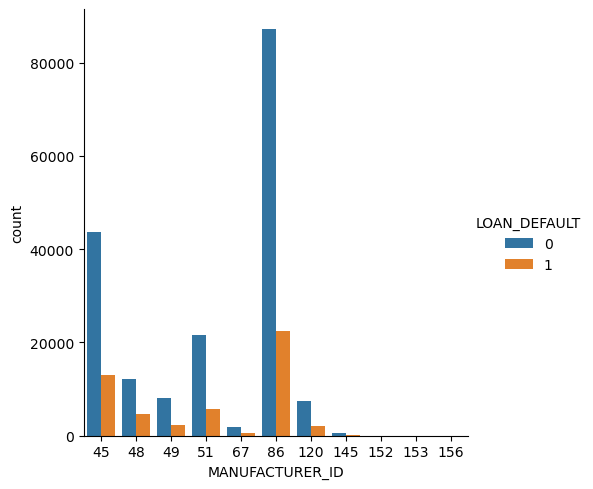

In [20]:
sns.catplot(data=loan_df,kind='count',x='MANUFACTURER_ID',hue='LOAN_DEFAULT')
plt.show()

Still have 4 categorical variables to investigate!
- EMPLOYMENT_TYPE: Employment Type of the customer
- PERFORM_CNS_SCORE_DESCRIPTION: Bureau score description 
- STATE_ID: State of disbursement 
- DISBURSAL_MONTH: The month in which the loan was disbursed

### SOLUTION

- Use print statements to make output readable 

In [22]:
def explore_categorical(col_name):   
    print("{0} Summary".format(col_name))
    print("\n")

    print("{0} Counts".format(col_name))
    print(loan_df[col_name].value_counts())
    print("\n")

    print("{0} Ratio".format(col_name))
    print(loan_df[col_name].value_counts(normalize=True))
    print("\n")

    print("{0} Default Counts".format(col_name))
    print(loan_df.groupby(col_name)['LOAN_DEFAULT'].value_counts().unstack(level=-1))
    print("\n")

    print("{0} Default Ratio".format(col_name))
    print(loan_df.groupby(col_name)['LOAN_DEFAULT'].value_counts(normalize=True).unstack(level=-1))
    print("\n")

    sns.catplot(data=loan_df,kind='count',x=col_name,hue='LOAN_DEFAULT')
    plt.show()

DISBURSAL_MONTH Summary


DISBURSAL_MONTH Counts
10    84875
8     56975
9     54443
11     6709
6      5991
12     5613
3      5148
4      4627
7      4150
5      2890
1      1708
2        25
Name: DISBURSAL_MONTH, dtype: int64


DISBURSAL_MONTH Ratio
10    0.364030
8     0.244366
9     0.233507
11    0.028775
6     0.025695
12    0.024074
3     0.022080
4     0.019845
7     0.017799
5     0.012395
1     0.007326
2     0.000107
Name: DISBURSAL_MONTH, dtype: float64


DISBURSAL_MONTH Default Counts
LOAN_DEFAULT         0      1
DISBURSAL_MONTH              
1                 1316    392
2                   23      2
3                 4094   1054
4                 3636    991
5                 2279    611
6                 4697   1294
7                 3222    928
8                44938  12037
9                43910  10533
10               64474  20401
11                5484   1225
12                4470   1143


DISBURSAL_MONTH Default Ratio
LOAN_DEFAULT            0         1
DISBURSA

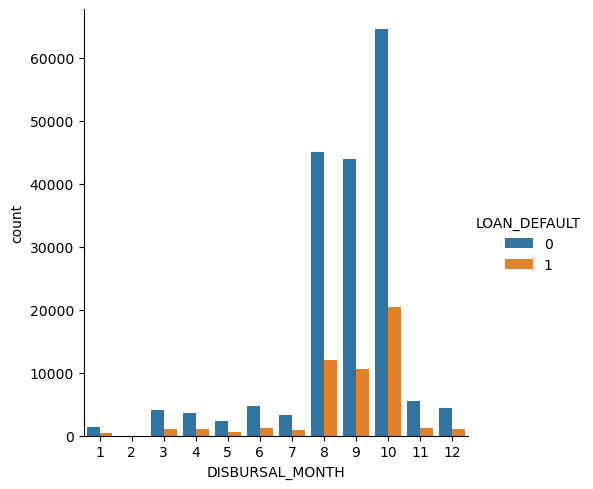

In [23]:
explore_categorical("DISBURSAL_MONTH")

- The vast majority of loans were disbursed in August, September and October 
- Loans disbursed in October had the highest rate of default ~24%

- The first port of call for exploring continuous variables
- The mean, median, IQR, standard deviation and min/max to get an idea of the range of data and how it is distributed

In [24]:
loan_df["AGE"].describe()

count    233154.000000
mean         33.902871
std           9.829475
min          17.000000
25%          26.000000
50%          32.000000
75%          41.000000
max          69.000000
Name: AGE, dtype: float64

Notes
- The mean is 33.9
- The medium is 32 (medium is smaller, could the distribution be skewed a little)
- Max is far bigger than 3rd Q, probably has a right tail
- Min of 17 and Max of 69, these are reasonable so no erroneous outliers 

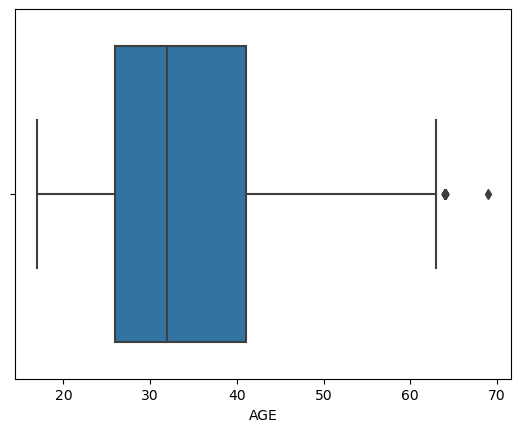

In [25]:
sns.boxplot(x="AGE", data=loan_df)
plt.show()

Right tail



/var/folders/j5/7_nbp06d53dgtnljmfh9tfx00000gn/T/ipykernel_64920/2709744958.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_df['AGE'], hist=False)


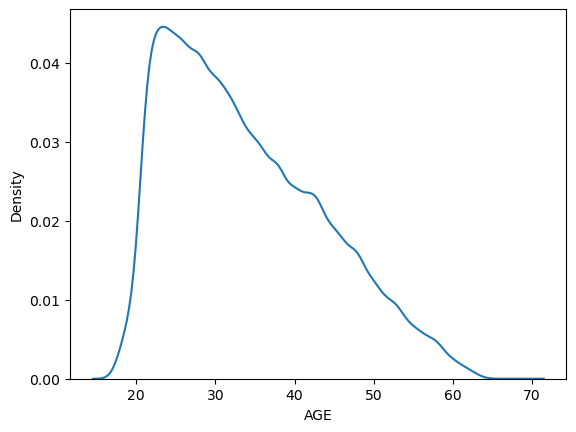

In [26]:
sns.distplot(loan_df['AGE'], hist=False)
plt.show()

In [27]:
loan_df.groupby('LOAN_DEFAULT')['AGE'].describe()

count       mean       std   min   25%   50%   75%   max
LOAN_DEFAULT                                                             
0             182543.0  34.090713  9.860825  17.0  26.0  32.0  41.0  69.0
1              50611.0  33.225366  9.685441  17.0  25.0  31.0  40.0  64.0

People who defaulted were generally younger. 



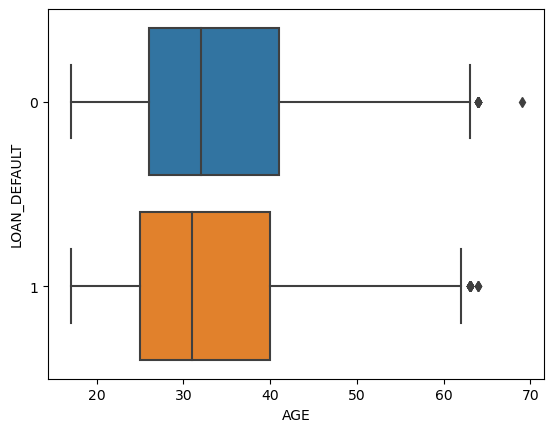

In [28]:
sns.boxplot(x='AGE', y='LOAN_DEFAULT', data=loan_df, orient="h")
plt.show()

The distribution of AGE within the group of people who defaulted was marginally younger

### SOLUTION

In [29]:
def explore_continuous(col_name):
    #print statistical summary
    print("{0} Summary".format(col_name))
    print("\n")
    print(loan_df[col_name].describe())
    print("\n")

    #Look at boxplot
    sns.boxplot(x=col_name, data=loan_df)
    plt.show()

    #Look at the distribution
    sns.distplot(loan_df[col_name], hist=False)
    plt.show()

    #Now lets look deeper by grouping with the target variable 
    print("{0} Grouped Summary".format(col_name))
    print("\n")
    print(loan_df.groupby('LOAN_DEFAULT')[col_name].describe())

    #look at grouped boxplot 
    sns.boxplot(x=col_name, y='LOAN_DEFAULT', data=loan_df, orient="h")
    plt.show()

DISBURSED_AMOUNT Summary


count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: DISBURSED_AMOUNT, dtype: float64




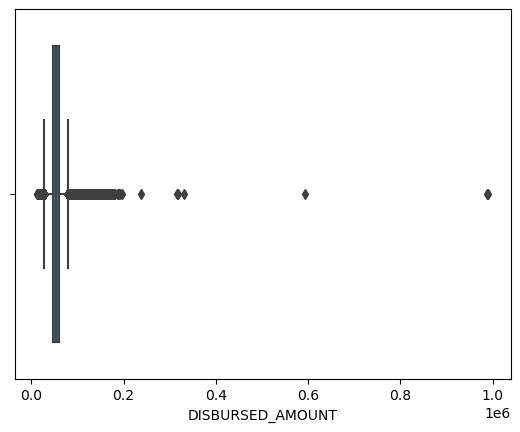

/var/folders/j5/7_nbp06d53dgtnljmfh9tfx00000gn/T/ipykernel_64920/115762789.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_df[col_name], hist=False)


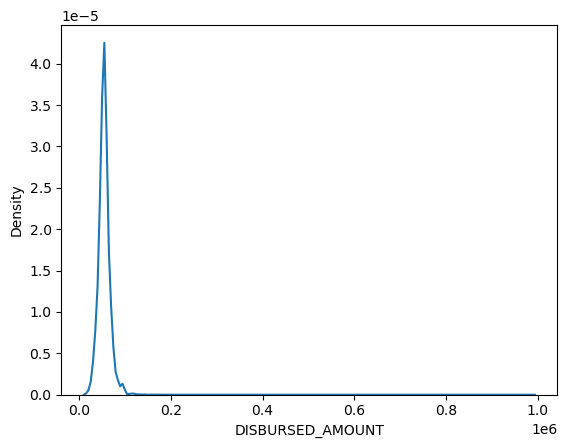

DISBURSED_AMOUNT Grouped Summary


                 count          mean           std      min      25%      50%  \
LOAN_DEFAULT                                                                    
0             182543.0  53826.471111  13140.699007  13320.0  46369.0  53303.0   
1              50611.0  56270.473869  12150.255527  13369.0  49303.0  55459.0   

                  75%       max  
LOAN_DEFAULT                     
0             59947.0  990572.0  
1             61947.0  191392.0  


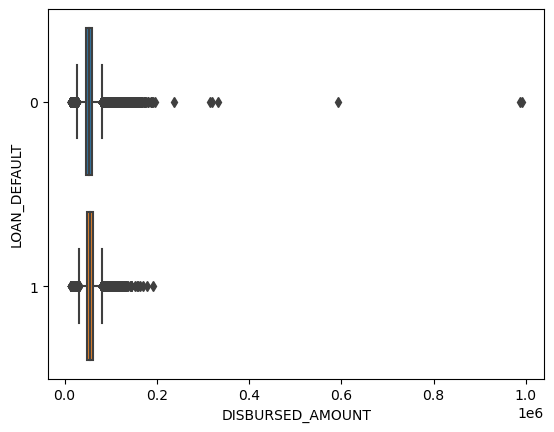

In [30]:
explore_continuous('DISBURSED_AMOUNT')

Things to note 

- There are some huge outliers here
- Generally, the disbursed amount for defaulted loans was larger, or at least the distribution ranges over larger values 

## Lesson 5 - Binary Variables & Conclusion

You may have noticed that our data contains several columns with the underscore _FLAG

- MOBILENO_AVL_FLAG: if Mobile no. was shared by the customer then flagged as 1
- AADHAR_FLAG: if aadhar was shared by the customer then flagged as 1
- PAN_FLAG: if pan was shared by the customer then flagged as 1
- VOTERID_FLAG: if voter id was shared by the customer then flagged as 1
- DRIVING_FLAG: if DL was shared by the customer then flagged as 1
- PASSPORT_FLAG: if passport was shared by the customer then flagged as 1

These are binary or boolean fields where a 1 means that some piece of personal information was provided by the customer and 0 means it was not.
We already dropped the MOBILENO_AVL_FLAG because the value was the same for all rows. 

Essentially these columns can be considered as categoricals so we can use our explore_categorical function to look at them!

Let's have a look at 'AADHAR_FLAG'. An AADHAR number is a 12 digit personal id number provided to residents of India by the government

In [ ]:
explore_categorical('AADHAR_FLAG')

Looks like people who didn't provide their AADHAR number defaulted more frequently at 25.6%!

## Conclusion

- In this chapter, we have demonstrated some techniques to carry out basic exploratory analysis 
- This is only scratching the surface
- Specific techniques used for exploration may be dependent on both the data and its context
- Spend some time now exploring the data further
- Combine these techniques with your own intuition to formulate some hypothesis as to why a particular person might default on their loan
- As always if you have made changes to the data you wish to carry forward, remember to save it!

In [ ]:
loan_df.to_csv('../data/vehicle_loans_eda.csv')